**NAME - Raju**

In [ ]:
pip install wbgapi

In [1]:
import pandas as pd
import wbgapi as wb
import sklearn
import seaborn as sns
from sklearn.datasets import make_blobs
from numpy import array, exp
import itertools as iter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
ecn_indc = ['NE.DAB.TOTL.ZS','NY.GDP.MKTP.CD']
cod_contry = ["BMU","CHE",'DNK','BGR','BGD','ARG','GBR','IND','BRA','JAM']
cli_indc=['EG.ELC.RNWX.KH','EN.ATM.CO2E.GF.KT']
ecn_data  = wb.data.DataFrame(ecn_indc, cod_contry, mrv=7)
cli_data  = wb.data.DataFrame(cli_indc, cod_contry, mrv=7)
#NE.DAB.TOTL.ZS: Total expenditure
#NY.GDP.MKTP.CD: USD GDP of a country
#EG.ELC.RNWX.KH:	Electricity production from renewable sources %
#EN.ATM.CO2E.GF.KT: Emissions of Carbon dioxide from fuel 

In [3]:
# ECNMY INDICATOR
ecn_data.columns = [b.replace('YR','') for b in ecn_data.columns]      
ecn_data=ecn_data.stack().unstack(level=1)                             
ecn_data.index.names = ['Ctry_Code', 'Year']                           
ecn_data.columns                                                     
ecn_data.fillna(0)
ecn_data.head(9)

series          NE.DAB.TOTL.ZS  NY.GDP.MKTP.CD
Ctry_Code Year                                
ARG       2014       99.595836    5.263197e+11
          2015      101.074922    5.947493e+11
          2016      101.039698    5.575314e+11
          2017      102.649034    6.436287e+11
          2018      101.889164    5.248197e+11
          2019       96.994042    4.519324e+11
          2020       93.070816    3.892881e+11
BGD       2014      106.487933    1.728855e+11
          2015      106.728219    1.950787e+11

In [4]:
# CLMATE INDICATOR
cli_data.columns = [c.replace('YR','') for c in cli_data.columns]      
cli_data=cli_data.stack().unstack(level=1)                             
cli_data.index.names = ['Ctry_Code', 'Year']                           
cli_data.columns                                                     
cli_data.fillna(0)
cli_data.head(9)

series          EG.ELC.RNWX.KH  EN.ATM.CO2E.GF.KT
Ctry_Code Year                                   
ARG       2010    2.220000e+09          86999.575
          2011    2.155000e+09          92661.423
          2012    2.752000e+09          95459.344
          2013    2.942000e+09          90835.257
          2014    2.719000e+09          96691.456
          2015    2.752000e+09          98359.941
          2016             NaN         102268.963
BGD       2010    0.000000e+00          39431.251
          2011    0.000000e+00          39658.605

In [5]:
#Preprtion of the data
dfrm1=ecn_data.reset_index()
dfrm3=dfrm1.fillna(0)
dfrm2=cli_data.reset_index()
dfrm4=dfrm2.fillna(0)

In [6]:
#Getting the indicators for all the countries
dfrm = pd.merge(dfrm3, dfrm4)
dfrm.head(10)

series,Ctry_Code,Year,NE.DAB.TOTL.ZS,NY.GDP.MKTP.CD,EG.ELC.RNWX.KH,EN.ATM.CO2E.GF.KT
0,ARG,2014,99.595836,5.263197e+11,2.719000e+09,96691.456
1,ARG,2015,101.074922,5.947493e+11,2.752000e+09,98359.941
2,ARG,2016,101.039698,5.575314e+11,0.000000e+00,102268.963
3,BGD,2014,106.487933,1.728855e+11,1.490000e+08,45969.512
4,BGD,2015,106.728219,1.950787e+11,1.580000e+08,48782.101
5,BGD,2016,104.674816,2.214152e+11,0.000000e+00,53593.205
6,BGR,2014,101.085516,5.708201e+10,2.783000e+09,5412.492
7,BGR,2015,99.100768,5.078200e+10,3.107000e+09,5944.207
8,BGR,2016,95.092863,5.395390e+10,0.000000e+00,6153.226
9,BMU,2014,73.926721,6.413988e+09,0.000000e+00,0.000


In [7]:
#Normalization of the dfrm values
df1 = dfrm.iloc[:,2:]
dfrm.iloc[:,2:] = (df1-df1.min())/ (df1.max() - df1.min())
dfrm.head(7)

series,Ctry_Code,Year,NE.DAB.TOTL.ZS,NY.GDP.MKTP.CD,EG.ELC.RNWX.KH,EN.ATM.CO2E.GF.KT
0,ARG,2014,0.539749,0.168759,0.035192,0.608272
1,ARG,2015,0.569823,0.190971,0.035619,0.618769
2,ARG,2016,0.569107,0.178891,0.000000,0.643360
3,BGD,2014,0.679885,0.054036,0.001929,0.289188
4,BGD,2015,0.684771,0.061240,0.002045,0.306881
5,BGD,2016,0.643019,0.069789,0.000000,0.337147
6,BGR,2014,0.570039,0.016447,0.036020,0.034049


In [8]:
#K-means type clustering
df2 = dfrm.drop('Ctry_Code', axis = 1)
kmens = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df2)

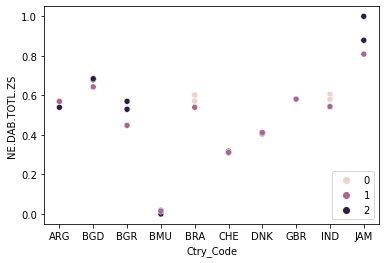

In [9]:
#Clustering the value of total expenditure for different countries
sns.scatterplot(data=dfrm, x="Ctry_Code", y="NE.DAB.TOTL.ZS", hue=kmens.labels_)
plt.legend(loc='lower right')
plt.show()

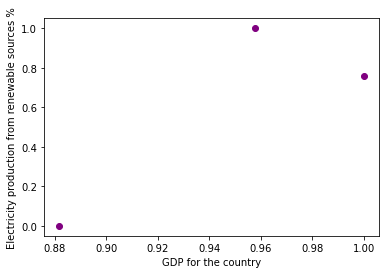

In [10]:
#Scatter plot - Electricity production from renewable sources % vs GDP in GBR

a=dfrm[(dfrm['Ctry_Code']=='GBR')]
b = a.values
x, y = b[:, 3], b[:, 4]
plt.scatter(x, y,color="purple")
plt.xlabel('GDP for the country')
plt.ylabel('Electricity production from renewable sources %')
plt.show()

Parameters value->:  [ 1.52839034e-305  6.62013102e-313 -7.44535683e-317]


C:\Users\alekh\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


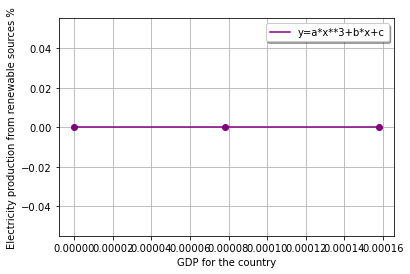

In [13]:
#Using curve_fit to do the fitting for Bermuda which has a low total expenditure
e=dfrm[(dfrm['Ctry_Code']=='BMU')]
f = e.values
x, y = f[:, 3], f[:, 4]

def func(x, a, b, c):
    return a*x**3+b*x+c
pmtr, cova = curve_fit(func, x, y)
pmtr, _ = curve_fit(func, x, y)
print("Parameters value->: ", pmtr)

a, b, c = pmtr[0], pmtr[1], pmtr[2]
yfit =a*x**3+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**3+b*x+c",color="purple")
    plt.grid(True)
    plt.xlabel('GDP for the country')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.plot(x, y, 'bo', label="Y orgnl value",color="purple")
    plt.ylabel('Electricity production from renewable sources %')
    plt.show() 

Parameters value->:  [-56.14217118 155.71842561 -98.81657956]


C:\Users\alekh\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


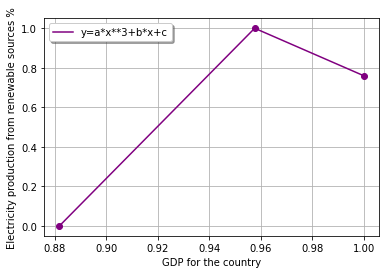

In [11]:
#Using curve_fit to do the fitting for GBR which has a medium total expenditure
x, y = b[:, 3], b[:, 4]

def func(x, a, b, c):
    return a*x**3+b*x+c
pmtr, cova = curve_fit(func, x, y)
pmtr, _ = curve_fit(func, x, y)
print("Parameters value->: ", pmtr)

a, b, c = pmtr[0], pmtr[1], pmtr[2]
yfit =a*x**3+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**3+b*x+c",color="purple")
    plt.grid(True)
    plt.xlabel('GDP for the country')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.plot(x, y, 'bo', label="Y orgnl value",color="purple")
    plt.ylabel('Electricity production from renewable sources %')
    plt.show() 

Parameters value->:  [ 2.35676711e+08 -4.33389209e+03  7.15307227e+00]


C:\Users\alekh\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


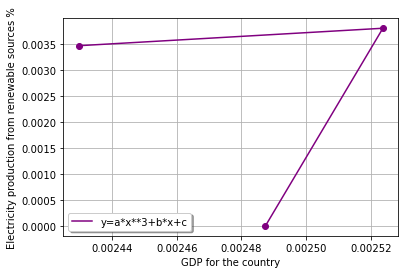

In [14]:
#Using curve_fit to do the fitting for Jamaica which has a high total expenditure
h=dfrm[(dfrm['Ctry_Code']=='JAM')]
j = h.values
x, y = j[:, 3], j[:, 4]

def func(x, a, b, c):
    return a*x**3+b*x+c
pmtr, cova = curve_fit(func, x, y)
pmtr, _ = curve_fit(func, x, y)
print("Parameters value->: ", pmtr)

a, b, c = pmtr[0], pmtr[1], pmtr[2]
yfit =a*x**3+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**3+b*x+c",color="purple")
    plt.grid(True)
    plt.xlabel('GDP for the country')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.plot(x, y, 'bo', label="Y orgnl value",color="purple")
    plt.ylabel('Electricity production from renewable sources %')
    plt.show() 

**It can be understood from the visualisations that the country with a high total expenditure has a direct relationship between GDP of the country and the electricity production from renewable sources %. For the country with a medium total expenditure, the relationship between GDP of the country and the electricity production from renewable sources % is direct till a certain GDP and after than it becomes indirect. For the country with a low total expenditure, the relationship between GDP of the country and the electricity production from renewable sources % is parallel to x axis**

In [12]:
def err_ranges(x, func, param, sigma):
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 